In [1]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def covariance(X, Y, tau):
    if type(tau) == np.ndarray:
        res = np.zeros(len(tau))
        for i, v in enumerate(tau):
            res[i] = ((X[:(-v if v else len(X))] - X.mean()).values * (Y[v:] - Y.mean()).values).sum() / (X.shape[0] - v)
        return res
    return ((X[:(-tau if tau else len(X))] - X.mean()).values * (Y[tau:] - Y.mean()).values).sum() / (X.shape[0] - tau)
    
def correlation(X, Y, tau):
    return covariance(X, Y, tau) / (X.std() * Y.std())

In [3]:
def get_corrs(analysis_col, df, columns, lags):

    variable = df[analysis_col]
    cols = df[columns]
    
    ys = []
    for col in columns:
        y=np.append(correlation(variable, cols[col], -lags[:0:-1]),
                    correlation(variable, cols[col], lags))
        ys.append(max(y, key=abs))
    return ys

In [4]:
analysis_df = pd.read_csv('data//total_analysis_df.csv')
analysis_df['Date'] = pd.to_datetime(analysis_df['Date'])
analysis_df = analysis_df.set_index('Date')
analysis_df.head()

,Confirmed_new_US,Deaths_new_US,retail_US,retail_US_diff,grocery_US,grocery_US_diff,parks_US,parks_US_diff,transit_google_US,transit_google_US_diff,...,sbj18_count_weighted,sbj18_favourites_weighted,sbj18_retweet_weighted,sbj18_popularity_weighted,sbj18_engagement_weighted,sbj19_count_weighted,sbj19_favourites_weighted,sbj19_retweet_weighted,sbj19_popularity_weighted,sbj19_engagement_weighted
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-12,393.0,4.0,10.019729,0.298444,22.720821,11.653862,27.285120,-7.292266,3.783693,-0.742964,...,30.366361,514516.320753,45.712579,517724.963144,783.021048,27.048881,517553.563224,32.312411,519821.625393,539.441568
2020-03-13,565.0,8.0,4.074367,-5.945362,25.283834,2.563012,12.217885,-15.067236,-0.098021,-3.881714,...,51.415687,836270.520446,48.754029,839692.647253,968.619367,59.714706,798435.590596,48.365220,801830.426310,1060.201632
2020-03-14,662.0,7.0,-2.160826,-6.235193,18.225341,-7.058493,12.997491,0.779606,-1.399180,-1.301159,...,30.026926,412672.078334,35.293293,415149.373605,498.918563,33.665548,952106.469811,54.937148,955962.600118,529.734021
2020-03-15,676.0,6.0,-2.062134,0.098692,16.525736,-1.699605,17.774478,4.776987,-2.441142,-1.041962,...,34.589109,614574.186140,39.893033,617374.344831,511.806045,37.896720,675710.595514,45.739917,678921.156824,733.813344
2020-03-16,872.0,14.0,-1.841855,0.220279,24.997330,8.471594,8.546993,-9.227485,-7.109609,-4.668467,...,41.989440,500040.190409,36.960089,502634.480863,650.507595,39.237705,546805.424915,39.925328,549607.850484,705.573526


In [5]:
covid_columns = ['Confirmed_new_US', 'Deaths_new_US']
mobility_columns = [col for col in analysis_df.columns if 'US' in col and col not in covid_columns and 'diff' not in col]
cluster_titles = ['home', 'sanitisers', 'isolation', 'distance', 'family', 'masks', 'washhands', 'workhome', 'health', 'total']
metrics = ['_count', '_popularity']
cluster_columns = ['cluster_' + title + metric for title in cluster_titles for metric in metrics]
sbjs = ['sbj' + str(i) for i in range(20)]
sbjs10 = ['sbj' + str(i) for i in range(10)]
sbjs20 = ['sbj' + str(i) for i in range(10, 20)]
clusts = ['clust' + str(i) for i in range(5)]
sbj_columns = [title + metric for title in sbjs for metric in metrics]
sbj10_columns = [title + metric for title in sbjs10 for metric in metrics]
sbj20_columns = [title + metric for title in sbjs20 for metric in metrics]
clust_columns = [title + metric for title in clusts for metric in metrics]
metrics = ['_count_weighted', '_favourites_weighted', '_retweet_weighted', '_popularity_weighted', '_engagement_weighted']
weighted_sbj_columns = [title + metric for title in sbjs for metric in metrics]

In [6]:
stable_analysis_df = analysis_df.loc[(analysis_df.index > '2020-03-19') & (analysis_df.index < '2020-05-01')]

In [7]:
num_lags = 3
lags = np.arange(0, num_lags+1)

In [9]:
# analysis_columns = sbj_columns + mobility_columns + covid_columns
analysis_columns = [col for col in weighted_sbj_columns if 'count' in col or 'popularity' in col] + mobility_columns + covid_columns
in_rows = 'US'
in_columns = 'sbj'

In [10]:
corr_data = stable_analysis_df[analysis_columns]
corr_matrix = corr_data.corr().filter(regex = in_rows, axis=0).filter(regex = in_columns, axis=1)

for col in corr_matrix.index:
    new_corrs = get_corrs(col, stable_analysis_df, corr_matrix.columns, lags)
    for i, old_corr in enumerate(corr_matrix.loc[col]):
        if abs(new_corrs[i]) < abs(old_corr):
            new_corrs[i] = old_corr
    corr_matrix.loc[col] = new_corrs

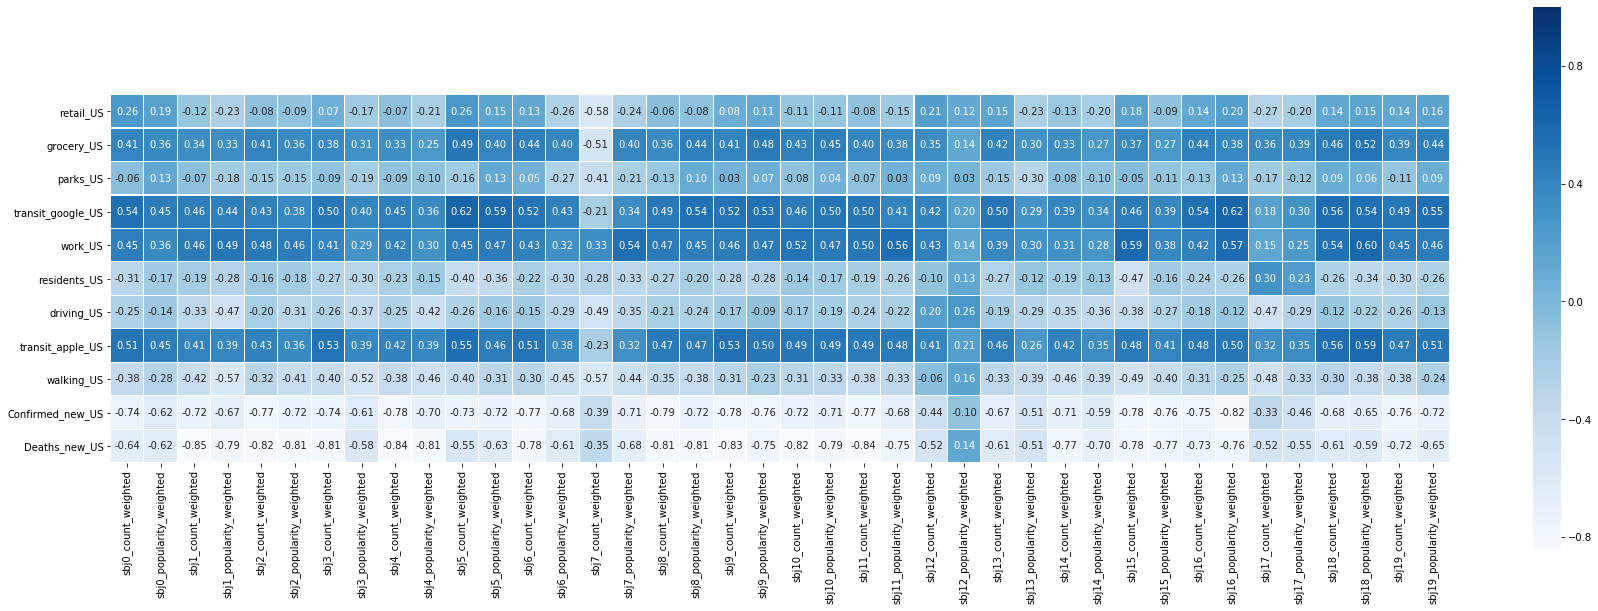

In [11]:
f, ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix, linewidths=0.1, vmax=1.0, square=True, fmt= '.2f', annot=True, cmap = 'Blues', ax=ax)

In [12]:
analysis_columns = [col for col in weighted_sbj_columns if 'popularity' in col or 'engagement' in col] + mobility_columns + covid_columns

In [13]:
corr_data = stable_analysis_df[analysis_columns]
corr_matrix = corr_data.corr().filter(regex = in_rows, axis=0).filter(regex = in_columns, axis=1)

for col in corr_matrix.index:
    new_corrs = get_corrs(col, stable_analysis_df, corr_matrix.columns, lags)
    for i, old_corr in enumerate(corr_matrix.loc[col]):
        if abs(new_corrs[i]) < abs(old_corr):
            new_corrs[i] = old_corr
    corr_matrix.loc[col] = new_corrs

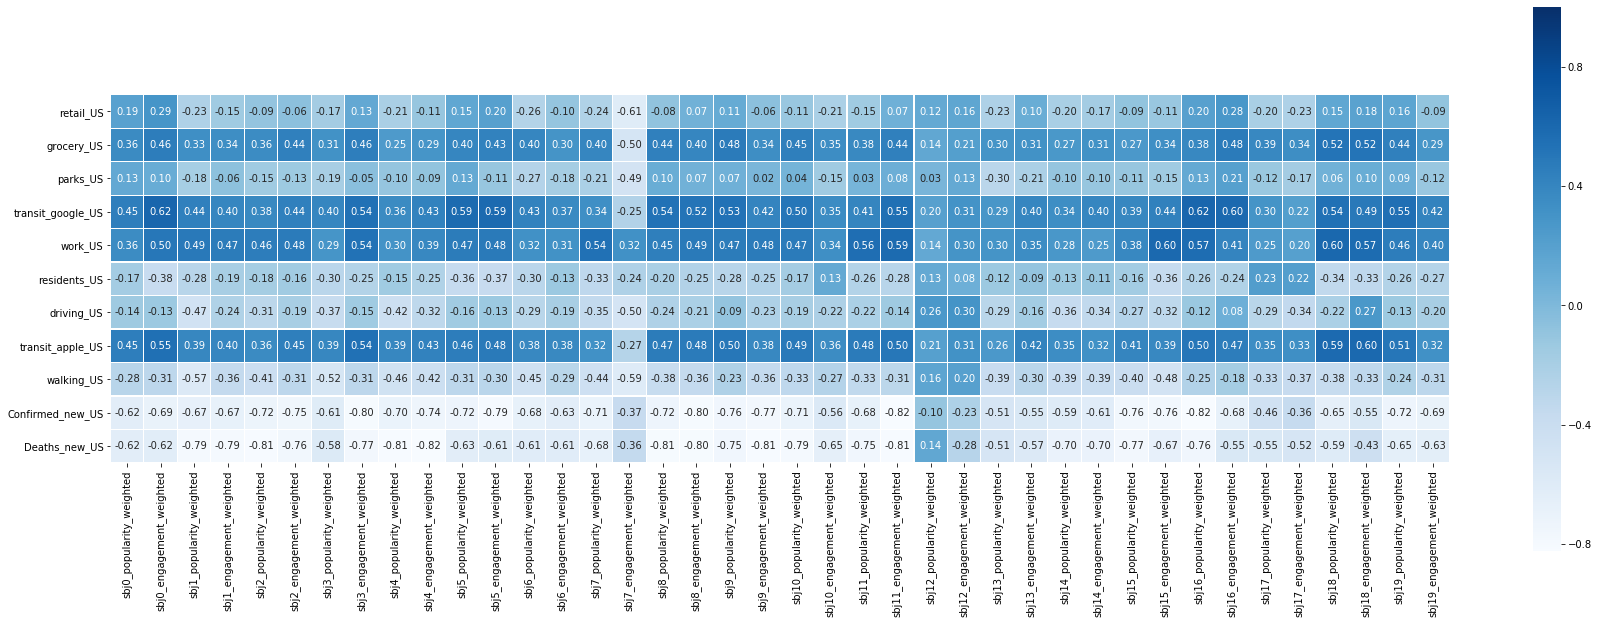

In [14]:
f, ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix, linewidths=0.1, vmax=1.0, square=True, fmt= '.2f', annot=True, cmap = 'Blues', ax=ax)

In [18]:
analysis_columns = [col for col in weighted_sbj_columns if 'favourites' in col or 'retweet' in col] + mobility_columns + covid_columns

In [19]:
corr_data = stable_analysis_df[analysis_columns]
corr_matrix = corr_data.corr().filter(regex = in_rows, axis=0).filter(regex = in_columns, axis=1)

for col in corr_matrix.index:
    new_corrs = get_corrs(col, stable_analysis_df, corr_matrix.columns, lags)
    for i, old_corr in enumerate(corr_matrix.loc[col]):
        if abs(new_corrs[i]) < abs(old_corr):
            new_corrs[i] = old_corr
    corr_matrix.loc[col] = new_corrs

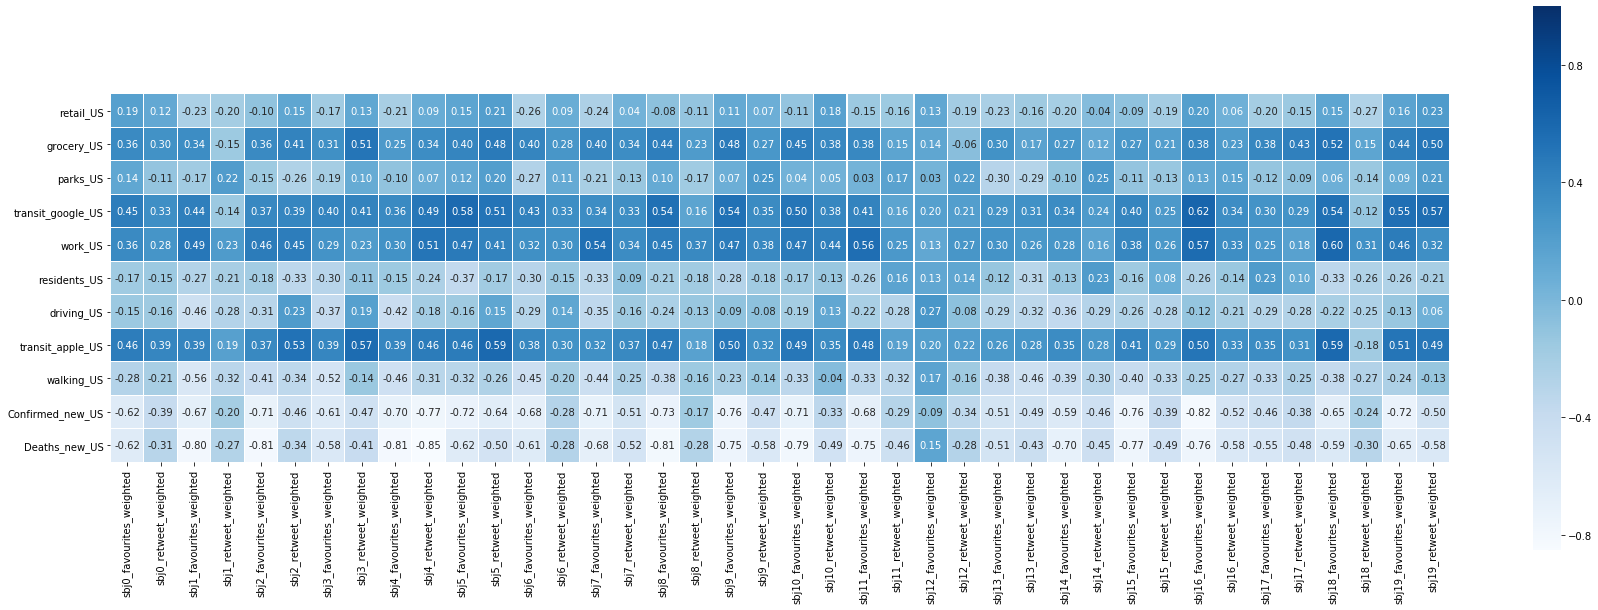

In [20]:
f, ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix, linewidths=0.1, vmax=1.0, square=True, fmt= '.2f', annot=True, cmap = 'Blues', ax=ax)